In [33]:
# Iris data 불러오기

import seaborn as sns # seaborn을 불러옴.
# iris라는 변수명으로 Iris data를 download함.
iris=sns.load_dataset('iris')
# 'species' 열을 drop하고 특성변수 X를 정의함
X=iris.drop('species',axis=1)
y=iris['species'] #'species'열을 label y를 정의함.

# LabelEncoder() method를 불러옴
from sklearn.preprocessing import LabelEncoder
classle=LabelEncoder()
# species 열의 문자형을 범주형 값으로 전환
y=classle.fit_transform(iris['species'].values)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
            test_size=0.3, random_state=123, stratify=y)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)


In [34]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
# Iris data에 대한 LDA 적합
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
cld=LinearDiscriminantAnalysis(store_covariance=True)
cld.fit(X_train,y_train) #LDA 적합
y_train_pred=cld.predict(X_train)
y_test_pred=cld.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_train_pred)) # train data에 대한 accuracy
print(accuracy_score(y_test,y_test_pred)) # test data에 대한 accuracy

0.9714285714285714
0.9777777777777777


In [36]:
# 분류 결과
from sklearn.metrics import confusion_matrix
# 각 행은 setosa, versicolor, virginica
print(confusion_matrix(y_test, y_test_pred))

[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


In [37]:
print(cld.means_)
print(cld.xbar_)
print(cld.covariance_)
print(cld.intercept_)
print(cld.coef_)

[[5.04285714 3.43428571 1.48857143 0.26571429]
 [5.89714286 2.76       4.22857143 1.3       ]
 [6.51714286 2.92857143 5.49142857 2.00285714]]
[5.81904762 3.04095238 3.73619048 1.18952381]
[[0.24214422 0.09216599 0.13204898 0.03123537]
 [0.09216599 0.11137415 0.05049796 0.03388844]
 [0.13204898 0.05049796 0.15023129 0.03387755]
 [0.03123537 0.03388844 0.03387755 0.04198639]]
[ -7.59067635  -5.09049202 -43.13606185]
[[  3.76019999  15.13062424 -17.99406267 -21.86481204]
 [ -0.91185753  -4.90401617   4.9041086    3.23562397]
 [ -2.84834246 -10.22660807  13.08995407  18.62918807]]


In [38]:
# 분류될 확률
print(cld.predict_proba(X_test[:5]))

[[1.37493315e-32 5.86839618e-01 4.13160382e-01]
 [4.87880054e-42 4.08368248e-04 9.99591632e-01]
 [1.49908347e-19 9.99998532e-01 1.46841688e-06]
 [2.45317549e-24 9.97417042e-01 2.58295753e-03]
 [1.76506456e-50 1.80298359e-07 9.99999820e-01]]


In [39]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
cqd=QuadraticDiscriminantAnalysis(store_covariance=True)

cqd.fit(X_train, y_train) #QDA 적합
y_train_pred=cqd.predict(X_train)
y_test_pred=cqd.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred)) # train data에 대한 accuracy
print(accuracy_score(y_test, y_test_pred)) # test data에 대한 accuracy

0.9809523809523809
0.9777777777777777


In [40]:
print(cqd.means_)
print(cqd.covariance_)

[[5.04285714 3.43428571 1.48857143 0.26571429]
 [5.89714286 2.76       4.22857143 1.3       ]
 [6.51714286 2.92857143 5.49142857 2.00285714]]
[array([[0.13605042, 0.11084034, 0.0105042 , 0.01239496],
       [0.11084034, 0.14467227, 0.01716807, 0.01444538],
       [0.0105042 , 0.01716807, 0.03280672, 0.0072437 ],
       [0.01239496, 0.01444538, 0.0072437 , 0.01290756]]), array([[0.22793277, 0.07635294, 0.13596639, 0.03647059],
       [0.07635294, 0.09364706, 0.07852941, 0.04058824],
       [0.13596639, 0.07852941, 0.18268908, 0.06      ],
       [0.03647059, 0.04058824, 0.06      , 0.03647059]]), array([[0.38381513, 0.09743697, 0.26132773, 0.04759664],
       [0.09743697, 0.10563025, 0.0602521 , 0.04962185],
       [0.26132773, 0.0602521 , 0.24845378, 0.03737815],
       [0.04759664, 0.04962185, 0.03737815, 0.08028571]])]


In [41]:
# 분류 결과
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


In [42]:
# 다항베이즈 모형
# Data 생성
import numpy as np
X=np.random.randint(5, size=(6,20)) # 0~4로 이뤄진 6 by 20 행렬
y=np.array([1,2,3,4,5,6])
print(X)

[[1 3 0 3 3 2 4 3 2 2 4 4 2 4 1 4 4 1 3 1]
 [0 4 1 1 2 2 2 2 3 4 4 4 1 4 0 3 2 3 2 1]
 [3 0 4 0 1 2 0 0 2 1 3 1 4 1 0 1 0 3 2 0]
 [3 0 2 2 4 1 3 1 3 1 3 3 3 0 2 3 3 1 4 3]
 [1 1 0 3 4 3 1 4 4 1 4 0 1 1 0 0 0 0 0 3]
 [4 0 0 1 1 0 3 3 0 0 0 1 1 4 4 3 1 3 4 1]]


In [43]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X,y)
print(mnb.predict(X[1:2,]))

[2]


In [44]:
# 1797명이 쓴 0~9를 식별
from sklearn.datasets import load_digits
digits=load_digits()
print(digits.images.shape) # 8 by 8 pixel로 이루어짐

(1797, 8, 8)


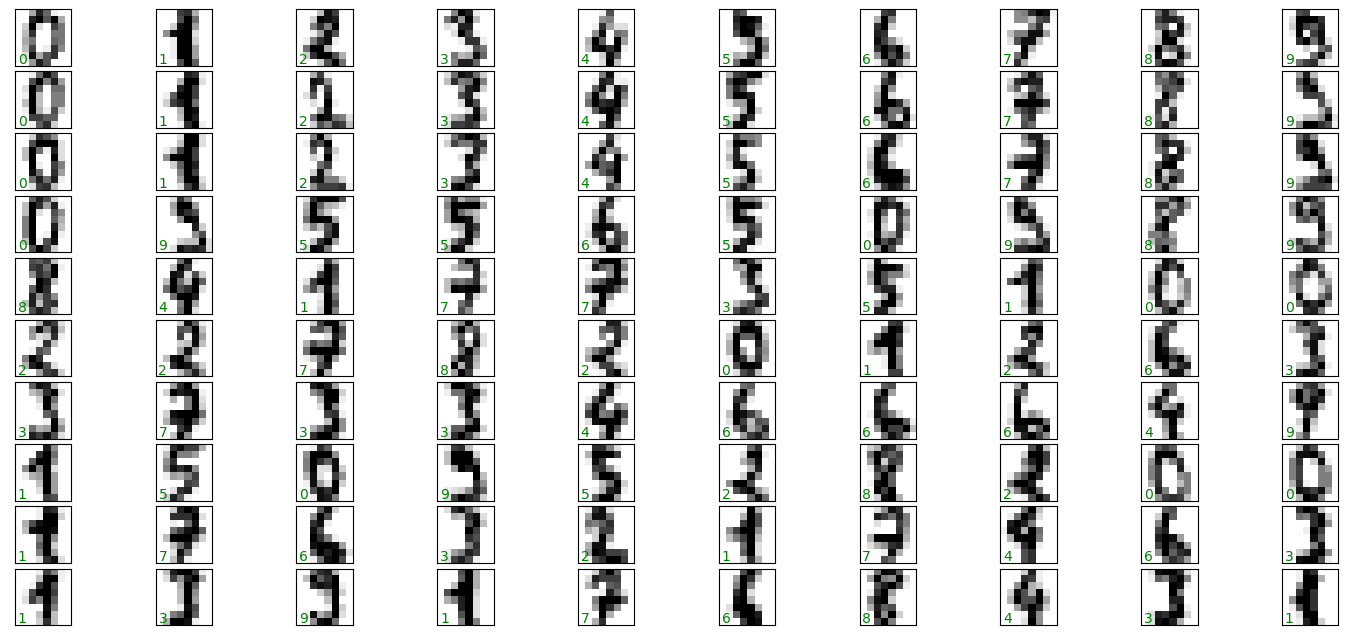

In [45]:
# 정규단순베이즈모형
# 구체적인 글씨 형태
import matplotlib.pyplot as plt
fig, axes=plt.subplots(10,10,figsize=(18,8),
                       subplot_kw={'xticks':[],'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary',
              interpolation='nearest')
    ax.text(0.05,0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [46]:
X=digits.data
y=digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [47]:
# 손글씨 데이터에 대한 정규단순베이즈모형 적합
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,
                        test_size=0.25, random_state=0)

from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train, y_train)
y_test_pred=gnb.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_pred))

0.8333333333333334


In [48]:
# 분류 결과
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test, y_test_pred)
print(mat)
#import seaborn as sns
#sns.heatmap(mat, square=True, annot=True, cbar=False)
#plt.xlabel('predicted')
#plt.ylabel('True values')

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  4  0]
 [ 0  7 20  2  0  0  0  0 15  0]
 [ 0  0  0 39  0  0  0  1  5  0]
 [ 0  1  0  0 31  0  0  6  0  0]
 [ 0  1  0  1  0 43  0  3  0  0]
 [ 0  0  1  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  6  0  1  0  1  0  2 38  0]
 [ 0  2  0  4  1  0  0  3  7 30]]
